In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() # load dataset
train_images, test_images = train_images/255, test_images/255 # normalize

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

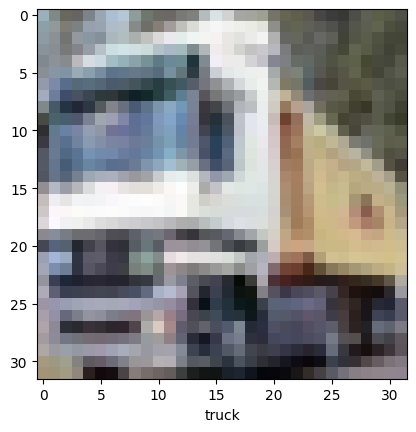

In [4]:
# looking at one image
IMG_INDEX = 1
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

- common architecture is a stack of Conv2d and MaxPooling2d layers followed by a few densely connected layers
- start with a conv2d layer of 32 3x3 filters, an activation function (applied to the output of the convolution)
- then a few 2x2, stride 2 max pooling and 64 3x3 filter conv2d layers

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

- notice that first layer output is 30x30, not 32x32, because we didn't do padding
- 30x30x32, 32 from each filter
- 2nd layer shrinks dimensions by a factor of 2^2
- depth increases, but spatial dimensions reduce a lot
- convolutional stuff isn't everything, this is our convolutional base

- now we add dense layers to do the classification

In [6]:
model.add(layers.Flatten()) # flattens the 4x4x64 into a 1d input
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # 10-class output
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
# training
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images,test_labels))


Epoch 1/10


1563/1563 [==============================] - 7s 4ms/step - loss: 1.5544 - accuracy: 0.4304 - val_loss: 1.3168 - val_accuracy: 0.5310
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1864 - accuracy: 0.5795 - val_loss: 1.1055 - val_accuracy: 0.6053
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0282 - accuracy: 0.6364 - val_loss: 1.0103 - val_accuracy: 0.6502
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9201 - accuracy: 0.6778 - val_loss: 0.9689 - val_accuracy: 0.6628
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8409 - accuracy: 0.7059 - val_loss: 0.9034 - val_accuracy: 0.6841
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7819 - accuracy: 0.7258 - val_loss: 0.9288 - val_accuracy: 0.6815
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7270 - accuracy: 0.7428 - val_loss: 0.8693 - val_accura